In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DataSets/Titanic.csv")
df.shape

(891, 12)

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Types of Missing Values
* MCAR:Missing Completely at Random
* MAR:Missing At Random,
* MNAR:Missing Not At Random
##### MCAR : The data are missing is independent of the observed and unobserved data
##### MAR : The data are missing is systematically related to the observed but not the unobserved data.
##### MNAR : The data are missing is systematically related to the unobserved data, that is, the missingness is related to                                    events or factors which are not measured by the researcher.
* MCAR: Missing data from Embarked
* MAR: Age & Cabin
* MNAR: e.g. Females:Age data is missing most of the time.....Which is not related to and feature from table

#### Methods:Handlling Missing Values

###### 1.Mean,Median  Emputation

In [4]:
class MM:
    def __init__(self,df,feature):
        self.feature = feature
        self.df = df
        self.mean = np.mean(df[feature])
         
    def ensembling(self):
        df[self.feature + '_mean_ensembling'] = df[self.feature].fillna(self.mean)
        return df[self.feature + '_mean_ensembling']

In [5]:
mm = MM(df,"Age")
mm.ensembling()

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_mean_ensembling, Length: 891, dtype: float64

<AxesSubplot:ylabel='Density'>

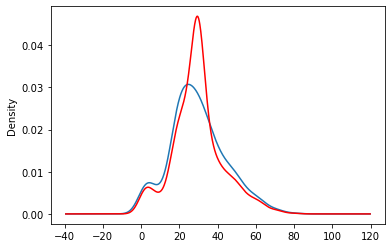

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind = 'kde', ax = ax)
df.Age_mean_ensembling.plot(kind = 'kde', ax = ax,color = 'red')

###### 2.Random Emputation

In [7]:
def random_esn(df,feature):
    na_len = df[feature].isna().sum()
    random_val = df[df[feature].isna() == False][feature].sample(na_len)
    not_null = df[df[feature].isna() == False][feature]     
    df1 = random_val 
    df2 = not_null   
    df = pd.concat([df1,df2],axis = 0)
    return df.sort_index(axis = 0)

In [8]:
df_random = random_esn(df,'Age')

###### This is the frequency distribution of mean and random emputation
####  So random emputation works better in MAR compare to mean emputation

<AxesSubplot:ylabel='Density'>

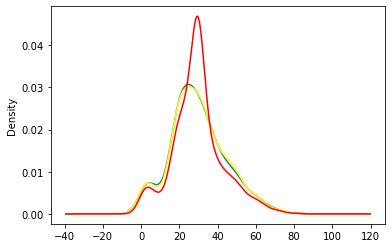

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind = 'kde', ax = ax)
df_random.plot(kind = 'kde', ax = ax,color = 'yellow')
df.Age_mean_ensembling.plot(kind = 'kde', ax = ax,color = 'red')

##### Fill Null Values by Prediction

In [10]:
X = df[df.Age.isna() == False][['Fare','Survived']]
y = df[df.Age.isna() == False]['Age']

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
y_test = df[df.Age.isna() == True][['Fare','Survived']]
y_pred = reg.predict(y_test) 
y_pred

array([30.12510206, 27.00204533, 26.80257682, 30.08250387, 26.82517289,
       30.10567331, 31.61385383, 26.82071032, 26.80272189, 30.10567331,
       30.11099937, 30.36832238, 26.82071032, 30.58175195, 27.77919534,
       30.79042882, 27.07961526, 30.10567331, 30.11099937, 26.82200557,
       30.11099937, 30.11099937, 30.10567331, 26.82157382, 27.38716633,
       30.11099937, 30.10063737, 27.32528101, 30.35954231, 30.08552612,
       30.13215512, 32.23520941, 28.45272535, 30.72840188, 30.7125722 ,
       32.23520941, 30.35277938, 31.5599524 , 27.08839533, 30.10063737,
       26.82071032, 32.23520941, 30.10063737, 30.10567331, 30.7125722 ,
       30.09372937, 30.33220045, 27.08839533, 30.08336737, 29.28859336,
       30.10063737, 30.10063737, 30.90369239, 26.82071032, 29.83295237,
       30.73099238, 30.79042882, 27.60649534, 26.82071032, 27.35608033,
       26.97959433, 30.11099937, 30.38293456, 32.23520941, 27.35608033,
       31.16929639, 30.10567331, 27.10911933, 31.04185239, 30.08

In [13]:
null_index = df[df.Age.isna() == True].index
null_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [18]:
predicted_age = pd.DataFrame(y_pred,index=null_index)

In [19]:
predicted_age

,0
5,30.125102
17,27.002045
19,26.802577
26,30.082504
28,26.825173
...,...
859,30.082649
863,32.235209
868,30.161082
878,30.105673


In [20]:
not_null = df[df.Age.isna() == False]['Age']
not_null

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [21]:
df_pred = pd.concat([not_null,predicted_age],axis = 0)
df_pred = df_pred.sort_index(axis = 0,ascending = True)
df_pred.head(10)

,0
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,30.125102
6,54.000000
7,2.000000
8,27.000000
9,14.000000


<AxesSubplot:ylabel='Density'>

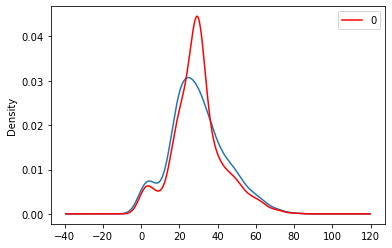

In [29]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind = 'kde', ax = ax)
df_pred.plot(kind = 'kde', ax = ax,color = 'red')
 